In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [15]:
''' converts from '.csv' file with no header to a numpy array'''
def extractData(s):
  data_df = pd.read_csv(s, header = None)
  return data_df.to_numpy()

In [16]:
''' converts from '.csv' file with header to a numpy array'''
def extractDataH(s):
  data_df = pd.read_csv(s)
  return data_df.to_numpy()

In [17]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)

  std = np.std(data, axis=0)
  for i in range(std.size):
    std[i] = 1 if (std[i] == False) else (std[i] == std[i])
    
  return ((data - np.mean(data, axis=0))/std)

In [21]:
''' returns np array with sigmoid value of each entry : sigmoid(x) = 1/(1+exp(-x)) '''
def sigmoid (data):
  data = np.round_(data, 5)
  return (1/(1 + np.exp(-data)))

In [23]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
#################################################################################################################################################################################

In [24]:
'''Converts vector with each entry representing class number to probability matrix with zeros and ones'''
def vectorToMatrix(y, num_class):
  m = y.size
  Y = np.zeros((m, num_class))
  count = 0
  for i in y:
    Y[count][i-1] = 1
    count +=1
  
  return Y

In [25]:
'''Converts probability matrix to vector with each entry representing class number'''
def matrixToVector(a):
  y = np.argmax(a, axis=1)+1
  y.shape = (y.size, 1)
  return y

In [26]:
'''Calculates accuracy as (number of correct predictions) *100/(total number of predictions)'''
def accuracy(hypothesis, y):

  count = 0
  for i in range(y.size):
    if y[i]==hypothesis[i]:
      count+=1

  accuracy = (count*100)/y.size

  return accuracy

In [27]:
#################################################################################################################################################################################

In [28]:
'''Calculates regiularised cost for classification'''
def regCost(hypothesis, y, theta1, theta2, reg_coeff):
  m = y.shape[0]
  cost = -( (np.sum( y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis) )))/m
  reg =  reg_coeff*(np.sum(theta1**2) + np.sum(theta2**2))
  return cost+reg

In [29]:
'''Calculates Root Mean Squared Error'''
def rmse(hypothesis, y):
  diff = hypothesis - y
  error = np.sqrt(np.mean(diff**2))

In [38]:
def NNClassificationTrain(X, y, num_classes, num_iter, alpha, reg_coeff):

  '''
  X             --> Design matrix of training examples
  y             --> Training class vector
  num_classes   --> number of classes
  num_iter      --> number of iterations
  alpha         -->learning rate
  reg_coeff     --> regularisation coefficiet
  '''

  #Concertinf class vector to probability matrix
  Y = vectorToMatrix(y, num_classes)

  m = X.shape[0]
  n = [X.shape[1], X.shape[1]-10, num_classes]
  # m --> number of training examples
  # n[0] --> number of units in input layer
  # n[1] --> number of units in hidden layer
  # n[2] --> number of units in output layer

  #Scaling and adding biad row to design matrix
  X = meanScaling(X)
  X = addBias(X)

  cost = []

  #initializing theta
  theta1 = np.random.rand(n[0]+1, n[1]) * np.sqrt(6.0/(n[0] + n[1])) - np.sqrt(6.0/(n[0] + n[1]))
  theta2 = np.random.rand(n[1]+1, n[2]) * np.sqrt(6.0/(n[1] + n[2])) - np.sqrt(6.0/(n[1] + n[2]))

  #training loop
  for i in range(num_iter):

    theta1_reg = theta1
    theta1_reg[0] = np.zeros((1, n[1]))

    theta2_reg = theta2
    theta2_reg = np.zeros((1, n[2]))

    # Foreward propagation
    a1 = sigmoid(X@theta1)
    a1 = addBias(a1)

    hypothesis = sigmoid(a1@theta2)

    # cost
    cost.append(regCost(hypothesis, Y, theta1_reg, theta2_reg, reg_coeff))

    # Backpropagation (grad)
    del3 = hypothesis - Y
    del2 = del3@(theta2.T) * a1 * (1-a1)

    DEL2 = (a1.T)@del3 + reg_coeff*theta2_reg
    DEL1 = (X.T)@del2[:,1:] + reg_coeff*theta1_reg

    # Gradient Decent
    
    theta1 -= alpha*DEL1/m
    theta2 -= alpha*DEL2/m

    print(i, "cost = ", cost[i])

  print(cost[-10:])
  plt.plot(cost)
  
  return theta1, theta2

In [31]:
def NNClassificationTest(X, y, theta1, theta2):

  '''
  X        --> Design matrix of features of testing data
  y        --> Target value vector of testing data
  theta1   --> parameter for input layer to hidden layer obtained after training
  theta2   --> parameter for hidden layer to output layer obtained after training
  '''

    #Scaling and adding biad row to design matrix
    X = meanScaling(X)
    X = addBias(X)

    # Foreward propagation
    a1 = sigmoid(X@theta1)
    a1 = addBias(a1)

    hypothesis = matrixToVector(sigmoid(a1@theta2))

    
    print('Accuracy =', accuracy(hypothesis, y),'%')

    return hypothesis

In [32]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-train.csv')
X_train, y_train = data_train[:, 1:], data_train[:,0]

In [35]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-test.csv')
X_test, y_test = data_test[:, 1:], data_test[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0 cost =  802.7305131854899
1 cost =  802.7294598152758
2 cost =  802.7284126246657
3 cost =  802.7273625096292
4 cost =  802.7263158647681
5 cost =  802.725266055726
6 cost =  802.7242161230438
7 cost =  802.7231696360345
8 cost =  802.722119550361
9 cost =  802.7210712721119
10 cost =  802.7200226841661
11 cost =  802.7189707904585
12 cost =  802.7179255619253
13 cost =  802.7168776873415
14 cost =  802.7158313251382
15 cost =  802.7147826170951
16 cost =  802.7137294545789
17 cost =  802.7126809358025
18 cost =  802.7116315709536
19 cost =  802.7105848186616
20 cost =  802.7095348457907
21 cost =  802.7084893109491
22 cost =  802.7074395103361
23 cost =  802.7063869398226
24 cost =  802.7053429963855
25 cost =  802.7042888302993
26 cost =  802.7032462427957
27 cost =  802.7021952224288
28 cost =  802.7011496721145
29 cost =  802.7000985511518
30 cost =  802.6990447983308
31 cost =  802.6980004957833
32 cost =  802.6969512222976
33 cost =  802.6959053958769
34 cost =  802.69485727461

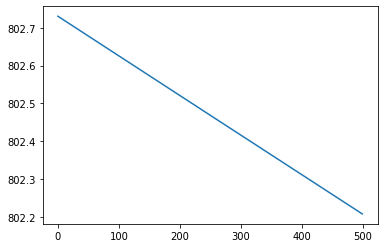

In [41]:
theta1, theta2 = NNClassificationTrain(X_train, y_train, 26, 500, 0.0001, 1)

In [42]:
hypothesis = NNClassificationTest(X_test, y_test, theta1, theta2)

Accuracy = 8.912162162162161 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
